<a href="https://colab.research.google.com/github/Naveenkuupireddy/ASE-PROJECT/blob/main/Crisis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%ls '/content/drive'

MyDrive/


In [ ]:
%cd "/content/drive/MyDrive/ASE Database"

/content/drive/MyDrive/ASE Database


In [ ]:
oildata= pd.read_csv("daily_csv.csv")
oildata

,Date,Price
0,1997-01-07,3.82
1,1997-01-08,3.80
2,1997-01-09,3.61
3,1997-01-10,3.92
4,1997-01-13,4.00
...,...,...
5948,2020-08-26,2.52
5949,2020-08-27,2.52
5950,2020-08-28,2.46
5951,2020-08-31,2.30


In [ ]:
oildata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5953 entries, 0 to 5952
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    5953 non-null   object 
 1   Price   5952 non-null   float64
dtypes: float64(1), object(1)
memory usage: 93.1+ KB


In [ ]:
# Converting the Date to a Datetime object

oildata['Date'] = pd.to_datetime(oildata['Date'])

In [ ]:
oildata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5953 entries, 0 to 5952
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    5953 non-null   datetime64[ns]
 1   Price   5952 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 93.1 KB


In [ ]:
print(f"Number of missing data : \n{oildata.isnull().sum()}\n")

Number of missing data : 
Date     0
Price    1
dtype: int64



In [ ]:
dataRN = oildata.fillna(method='ffill')
dataRN

,Date,Price
0,1997-01-07,3.82
1,1997-01-08,3.80
2,1997-01-09,3.61
3,1997-01-10,3.92
4,1997-01-13,4.00
...,...,...
5948,2020-08-26,2.52
5949,2020-08-27,2.52
5950,2020-08-28,2.46
5951,2020-08-31,2.30


In [ ]:
print(f"Number of missing data : \n{dataRN.isnull().sum()}\n")

Number of missing data : 
Date     0
Price    0
dtype: int64



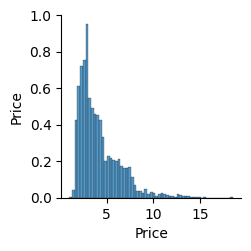

In [ ]:
sns.pairplot(oildata)

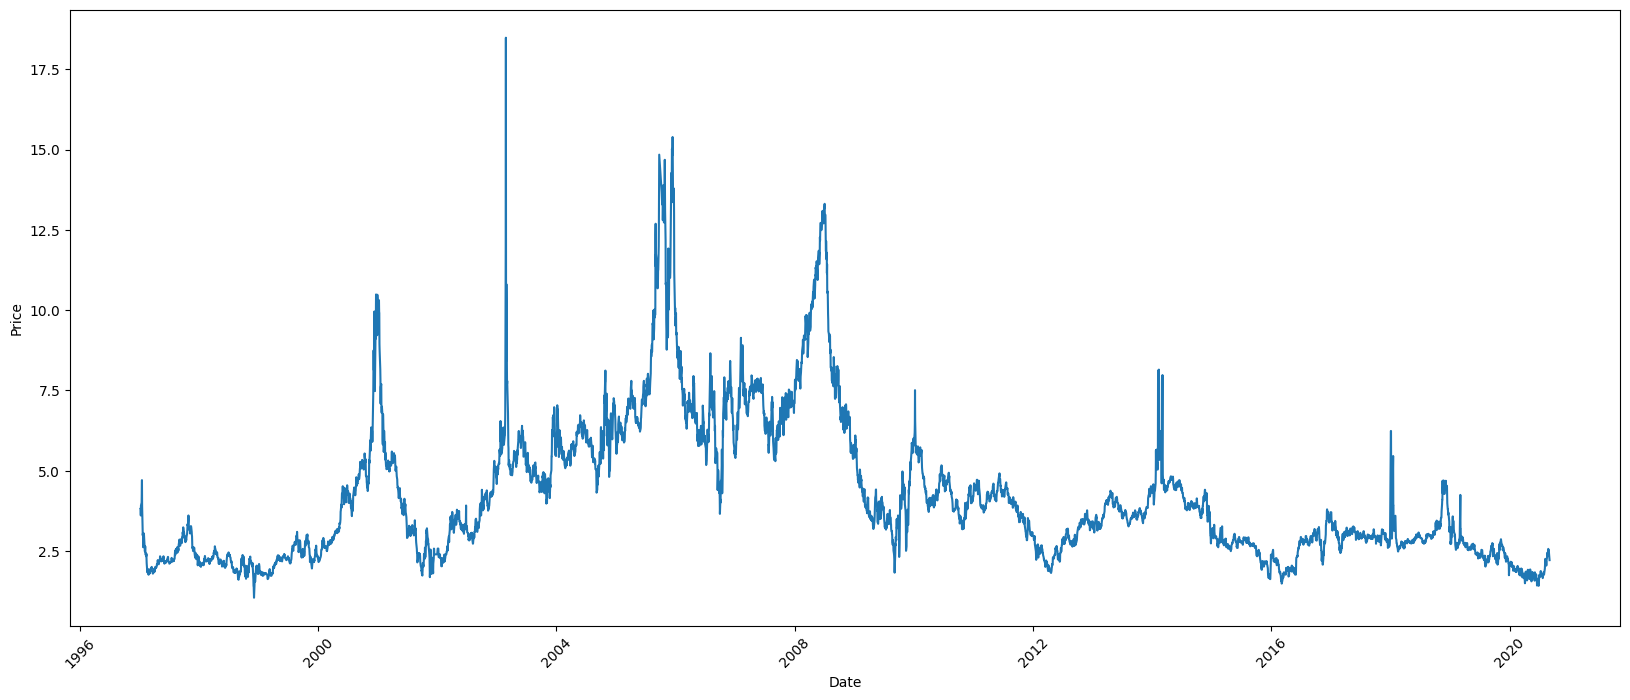

In [ ]:
import seaborn as sns
plt.rcParams["figure.figsize"] = (20,8)
sns.lineplot(data=dataRN, x="Date", y="Price")
plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
ax = plt.gca()

plt.show()

**Data** **Spliting**

In [ ]:
dataRN.describe()

,Price
count,5953.000000
mean,4.184722
std,2.190185
min,1.050000
25%,2.650000
50%,3.530000
75%,5.240000
max,18.480000


In [ ]:
# Splitting the dataset to train and test
split_ratio = 0.8 # 80% training data, 20% test data,

train_length = round(split_ratio * len(dataRN))
test_length = round(len(dataRN) - train_length)

print(train_length)
print(test_length)

4762
1191


In [ ]:
traindf = dataRN[:train_length].iloc[:,:] # picking the training samples
traindf

,Date,Price
0,1997-01-07,3.82
1,1997-01-08,3.80
2,1997-01-09,3.61
3,1997-01-10,3.92
4,1997-01-13,4.00
...,...,...
4757,2015-12-28,2.11
4758,2015-12-29,2.39
4759,2015-12-30,2.28
4760,2015-12-31,2.28


In [ ]:
testdf = dataRN[train_length:train_length+test_length].iloc[:,:] # picking the validation samples
testdf['Date'] = pd.to_datetime(testdf['Date'])
testdf

<ipython-input-37-2dee267b1fbc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testdf['Date'] = pd.to_datetime(testdf['Date'])


,Date,Price
4762,2016-01-04,2.39
4763,2016-01-05,2.33
4764,2016-01-06,2.37
4765,2016-01-07,2.35
4766,2016-01-08,2.47
...,...,...
5948,2020-08-26,2.52
5949,2020-08-27,2.52
5950,2020-08-28,2.46
5951,2020-08-31,2.30


In [ ]:
print(traindf.shape)
print(testdf.shape)

(4762, 2)
(1191, 2)


Since We are taking a time series data, we would most likely required to make our prediction prices hence we would pick 'Price' column from our dataset to construct the training data for the model.

In [ ]:
# Creating train dataset

df_train = traindf['Price'].values
df_train = np.reshape(df_train,(-1,1))
df_train.shape

(4762, 1)

In [ ]:
# Creating test dataset

df_test = testdf['Price'].values
df_test = np.reshape(df_test,(-1,1))
df_test.shape

(1191, 1)

In [ ]:
# Nomalizing the values to the 0-1 range to reduce the effect of variance
# Min-Max Scaler

scaler_train = MinMaxScaler()
scaler_test = MinMaxScaler()
df_train_scaled = scaler_train.fit_transform(df_train)
df_test_scaled = scaler_test.fit_transform(df_test)

print(df_train_scaled.shape)
print('----------------')
print(df_test_scaled.shape)

(4762, 1)
----------------
(1191, 1)


Transforming our df_train to x_train and y_train

So as this is a TIME SERIES dataset, we would try to consider data of a particular time frame to trian and then predict them on the following day

So for example, we would take price from:
-> day 0-11 and predict the price of 12th
-> day 1-12 and predict the price of 13th
-> day 2-13 and predict the price of 14th....

Hence we prepare the dataset accordingly, Xtrain has all the 12-day prices and the Ytrain has all the forecast prices (13th days).

In [ ]:
# look_back = number of features. No of days we look back to predict todays price. Use ACF and PACF to determine this
# Steps performed to create a timeseries data

def create_dataset(dataRN, look_back=1):
    dataX, dataY = [], []
    for i in range(look_back,len(dataRN)):
      dataX.append(dataRN[i-look_back:i,0])
      dataY.append(dataRN[i,0])
    return np.array(dataX), np.array(dataY)

In [ ]:
look_back = 12
x_train, y_train = create_dataset(df_train_scaled, look_back)
x_test, y_test = create_dataset(df_test_scaled, look_back)

In [ ]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = np.reshape(y_train, (y_train.shape[0], 1))

x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
y_test = np.reshape(y_test, (y_test.shape[0], 1))

In [ ]:
print(x_train.shape)
print(y_train.shape)

(4750, 12, 1)
(4750, 1)


In [ ]:
print(x_test.shape)
print(y_test.shape)

(1179, 12, 1)
(1179, 1)


In [ ]:
# This is the first sample, data of 0-12 days as x_train[0], original price on 13th day as y_train[0]
print(x_train[0])
print(y_train[0])

[[0.1589214 ]
 [0.15777395]
 [0.14687321]
 [0.16465863]
 [0.16924842]
 [0.16982215]
 [0.18875502]
 [0.20998279]
 [0.16408491]
 [0.12679289]
 [0.11130235]
 [0.11474469]]
[0.10958118]


In [ ]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dropout, Dense

In [ ]:
model = Sequential()
# RNN layer 1
model.add(SimpleRNN(12, input_shape=(look_back, 1), return_sequences=True))
model.add(Dropout(0.1))
#RNN layer 2
model.add(SimpleRNN(12, return_sequences=True))
model.add(Dropout(0.1))
#RNN layer 3
model.add(SimpleRNN(12, return_sequences=True))
model.add(Dropout(0.1))
#RNN layer 4
model.add(SimpleRNN(12))
model.add(Dropout(0.1))

# Dense layer
model.add(Dense(1))

#Compiling the model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

# Training the model
training = model.fit(x_train, y_train, epochs=100, batch_size=95)

Epoch 1/100
50/50 [==============================] - 6s 21ms/step - loss: 0.1821 - accuracy: 2.1053e-04
Epoch 2/100
50/50 [==============================] - 1s 15ms/step - loss: 0.0949 - accuracy: 2.1053e-04
Epoch 3/100
50/50 [==============================] - 1s 13ms/step - loss: 0.0464 - accuracy: 2.1053e-04
Epoch 4/100
50/50 [==============================] - 1s 13ms/step - loss: 0.0257 - accuracy: 2.1053e-04
Epoch 5/100
50/50 [==============================] - 1s 13ms/step - loss: 0.0179 - accuracy: 2.1053e-04
Epoch 6/100
50/50 [==============================] - 1s 12ms/step - loss: 0.0128 - accuracy: 2.1053e-04
Epoch 7/100
50/50 [==============================] - 1s 13ms/step - loss: 0.0100 - accuracy: 2.1053e-04
Epoch 8/100
50/50 [==============================] - 1s 13ms/step - loss: 0.0080 - accuracy: 2.1053e-04
Epoch 9/100
50/50 [==============================] - 1s 13ms/step - loss: 0.0067 - accuracy: 2.1053e-04
Epoch 10/100
50/50 [==============================] - 1s 13ms/st

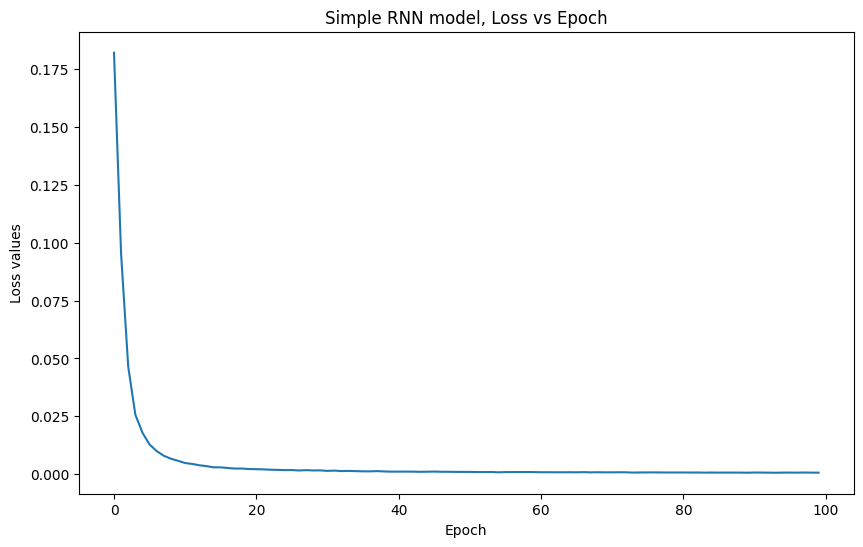

In [ ]:
# Trends of Loss
plt.figure(figsize =(10,6))
plt.plot(training.history["loss"])
plt.xlabel("Epoch")
plt.ylabel("Loss values")
plt.title("Simple RNN model, Loss vs Epoch")
plt.show()

## DOWNWARD TREND OF LOSS AND HAS SETTLED THERE

In [ ]:
model = Sequential()
# RNN layer 1
model.add(SimpleRNN(12, input_shape=(look_back, 1), return_sequences=True))
model.add(Dropout(0.1))
#RNN layer 2
model.add(SimpleRNN(12, return_sequences=True))
model.add(Dropout(0.1))
#RNN layer 3
model.add(SimpleRNN(12, return_sequences=True))
model.add(Dropout(0.1))
#RNN layer 4
model.add(SimpleRNN(12))
model.add(Dropout(0.1))

# Dense layer
model.add(Dense(1))

#Compiling the model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

# Testing the model
testing = model.fit(x_test, y_test, epochs=50, batch_size=95)

Epoch 1/50
13/13 [==============================] - 4s 16ms/step - loss: 0.4112 - accuracy: 0.0000e+00
Epoch 2/50
13/13 [==============================] - 0s 14ms/step - loss: 0.2031 - accuracy: 0.0017
Epoch 3/50
13/13 [==============================] - 0s 15ms/step - loss: 0.1723 - accuracy: 0.0025
Epoch 4/50
13/13 [==============================] - 0s 16ms/step - loss: 0.1490 - accuracy: 8.4818e-04
Epoch 5/50
13/13 [==============================] - 0s 15ms/step - loss: 0.1280 - accuracy: 0.0017
Epoch 6/50
13/13 [==============================] - 0s 15ms/step - loss: 0.1235 - accuracy: 0.0017
Epoch 7/50
13/13 [==============================] - 0s 15ms/step - loss: 0.1110 - accuracy: 0.0025
Epoch 8/50
13/13 [==============================] - 0s 14ms/step - loss: 0.0978 - accuracy: 0.0017
Epoch 9/50
13/13 [==============================] - 0s 15ms/step - loss: 0.0878 - accuracy: 0.0017
Epoch 10/50
13/13 [==============================] - 0s 14ms/step - loss: 0.0821 - accuracy: 0.0017
E

**Note:** The problem is that your final model output has a linear activation, making the model a regression, not a classification problem. "Accuracy" is defined when the model classifies data correctly according to class, but "accuracy" is effectively not defined for a regression problem, due to its continuous property.


MODELS PREDICTIONS USING RNN, LETS GET THE PREDICTIONS OF MODELS AND COMPARE IT WITH THE ORIGINAL VALUES

In [ ]:
# Price Predictions
preds = model.predict(x_train)
# Scale them back to original scale from 0-1
preds = scaler_train.inverse_transform(preds)
preds.shape


149/149 [==============================] - 1s 5ms/step


(4750, 1)

In [ ]:
#Original Values
# Scale them back to original scale from 0-1
y_train = scaler_train.inverse_transform(y_train)
y_train.shape

(4750, 1)

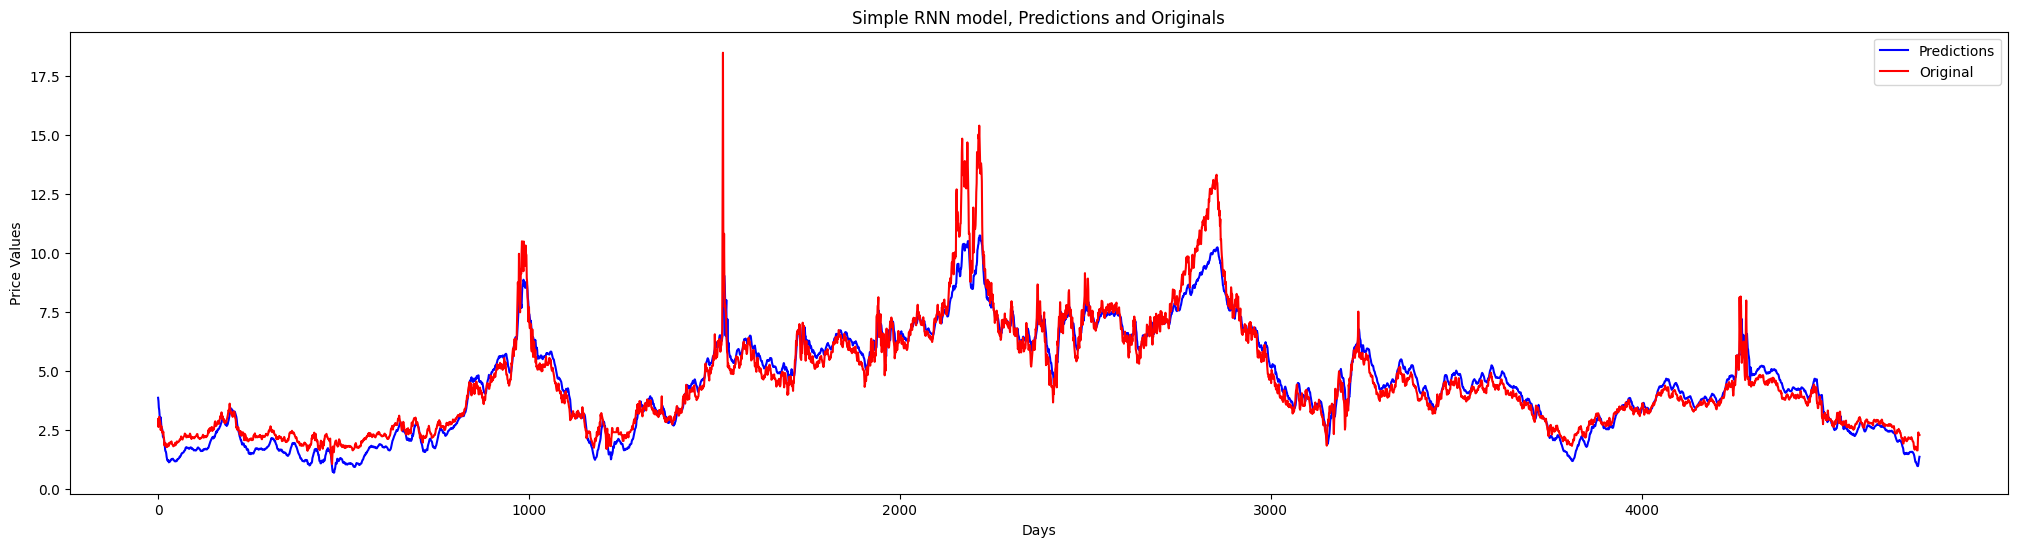

In [ ]:
# PLOTTING THE ORIGINAL VALUES AND PREDICTIONS ON TRAIN DATASET

plt.figure(figsize =(25,6))
#Predictions
plt.plot(preds, color = "blue", label = "Predictions")
# Original Values
plt.plot(y_train, color = "red", label = "Original")
plt.xlabel("Days")
plt.ylabel("Price Values")
plt.title("Simple RNN model, Predictions and Originals")
plt.legend()
plt.show()

NOW LETS TEST OUR MODELS PERFORMANCE THE VALIDATION DATASET(X_TEST, Y_TEST)

In [ ]:
# Price Predictions on Test dataset
test_preds = model.predict(x_test)
# Scale them back to original scale from 0-1
test_preds = scaler_test.inverse_transform(test_preds)
test_preds.shape

37/37 [==============================] - 0s 6ms/step


(1179, 1)

In [ ]:
# Original Values on Test Dataset
# Scale them back to original scale from 0-1
y_test = scaler_test.inverse_transform(y_test)
y_test.shape

(1179, 1)

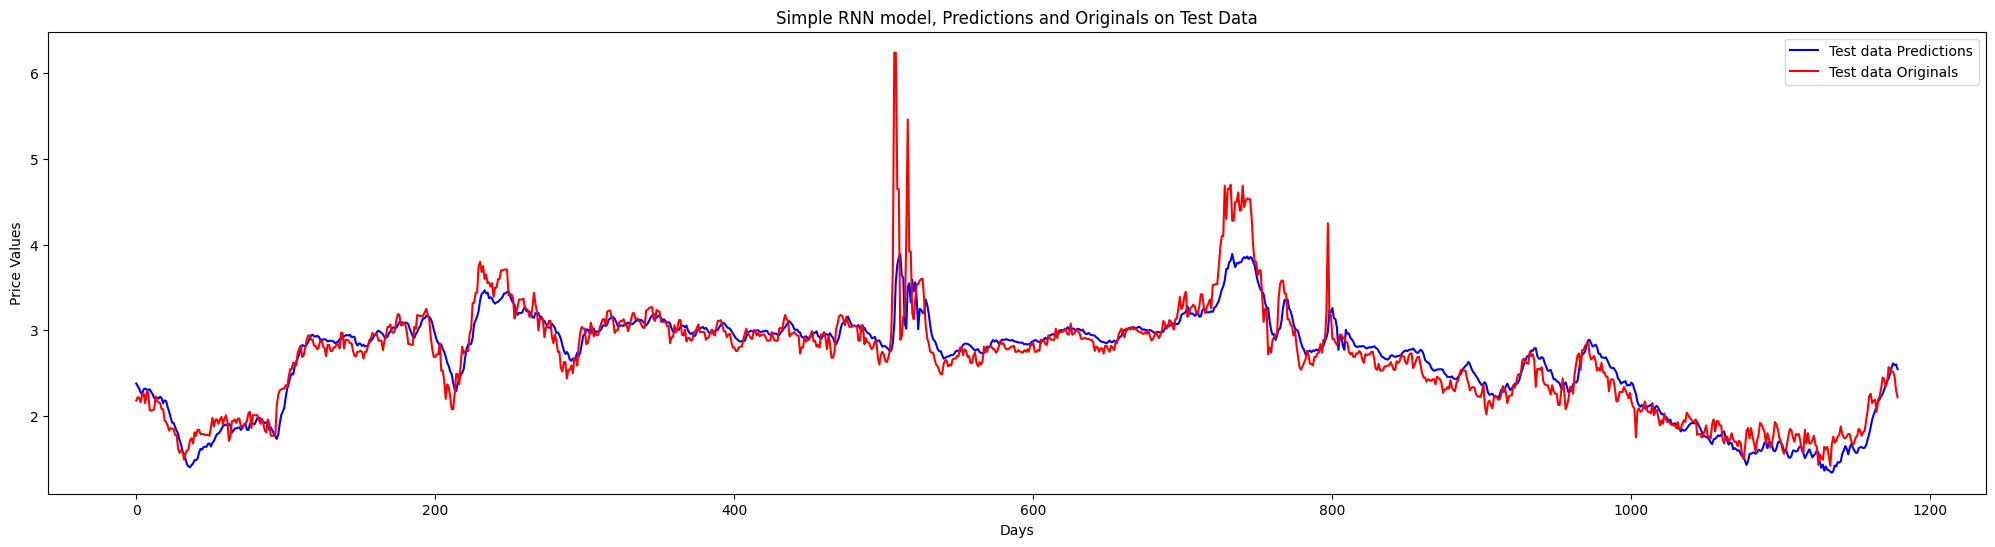

In [ ]:
# PLOTTING THE ORIGINAL VALUES AND PREDICTIONS ON THE TEST DATASET

plt.figure(figsize =(25,6))
#Predictions
plt.plot(test_preds, color = "blue", label = "Test data Predictions")
# Original Values
plt.plot(y_test, color = "red", label = "Test data Originals")
plt.xlabel("Days")
plt.ylabel("Price Values")
plt.title("Simple RNN model, Predictions and Originals on Test Data")
plt.legend()
plt.show()

<h3>As we can see, the predctions(indicated in blue) is almost very same to the original values(indicated in red) in the above plot except for some very rare outlier cases. Indicating our model has also performed very well on the dataset it hasnt seen(test dataset)

<H3> LETS TEST FOR THE LAST POSSIBLE VALUE IN A TEST DATASET
<p> i.e, we shall take the last 12 days price and predict 13th days price (which is not in the test dataset as well).

In [ ]:
# getting last 12 days data and converting to array
input = oildata.iloc[-12:]['Price'].values  
input

array([2.32, 2.45, 2.43, 2.35, 2.39, 2.57, 2.54, 2.52, 2.52, 2.46, 2.3 ,
       2.22])

In [ ]:
# converting to 2D array and scaling
input = scaler_train.fit_transform(input.reshape(-1,1))    
 # reshaping : converting to 3D array
input = np.reshape(input, (1,12,1))                   

input

array([[[0.28571429],
        [0.65714286],
        [0.6       ],
        [0.37142857],
        [0.48571429],
        [1.        ],
        [0.91428571],
        [0.85714286],
        [0.85714286],
        [0.68571429],
        [0.22857143],
        [0.        ]]])

In [ ]:
pred_RNN = model.predict(input)
pred_RNN = scaler_train.inverse_transform(pred_RNN)

print("Simple RNN Last day's Price prediction  :", round(pred_RNN[0][0], 2))

1/1 [==============================] - 0s 35ms/step
Simple RNN Last day's Price prediction  : 2.32


# FOOD DATA 

In [ ]:
fooddata= pd.read_csv("fooddata.csv")
fooddata

,Date,Price
0,3/1/2008,594.00
1,4/1/2008,907.00
2,5/1/2008,901.80
3,6/1/2008,757.00
4,7/1/2008,731.75
...,...,...
176,11/1/2022,440.00
177,12/1/2022,467.00
178,1/1/2023,517.00
179,2/1/2023,492.00


In [ ]:
fooddata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    181 non-null    object 
 1   Price   181 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.0+ KB


In [ ]:
print(f"Number of missing data : \n{fooddata.isnull().sum()}\n")

Number of missing data : 
Date     0
Price    0
dtype: int64



In [ ]:
fooddata['Date'] = pd.to_datetime(fooddata['Date'])

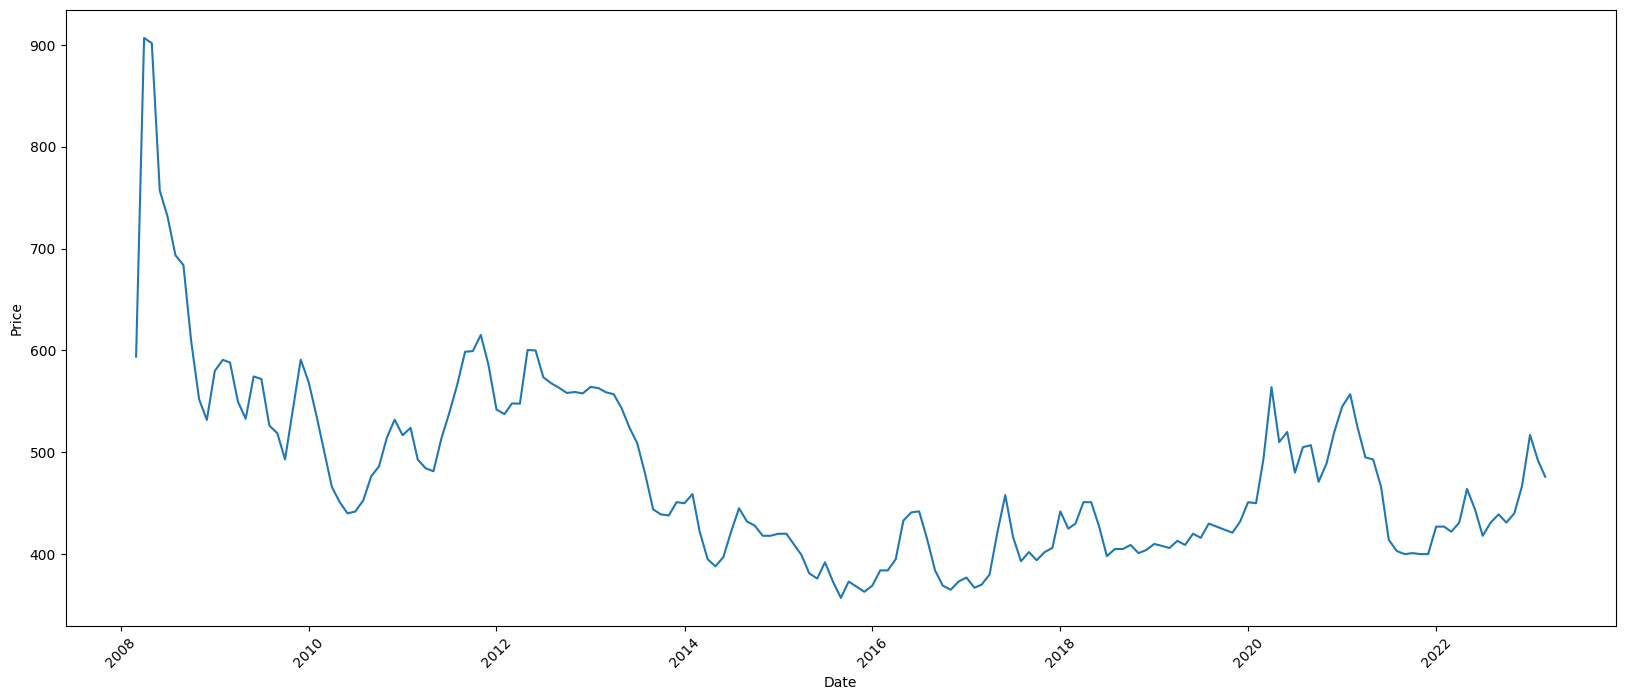

In [ ]:
import seaborn as sns
plt.rcParams["figure.figsize"] = (20,8)
sns.lineplot(data=fooddata, x="Date", y="Price")
plt.xticks( rotation = 45) # Rotates X-Axis Ticks by 45-degrees
ax = plt.gca()

plt.show()

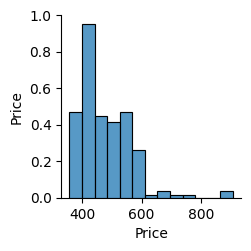

In [ ]:
sns.pairplot(fooddata)

In [ ]:
fooddata.describe()

,Price
count,181.000000
mean,476.953315
std,89.449581
min,357.000000
25%,413.000000
50%,451.000000
75%,533.000000
max,907.000000


In [ ]:
# Splitting the dataset to train and test
split_ratio = 0.8 # 80% training data, 20% test data,

train_length = round(split_ratio * len(fooddata))
test_length = round(len(fooddata) - train_length)

print(train_length)
print(test_length)

145
36


In [ ]:
traindff = fooddata[:train_length].iloc[:,:] # picking the training samples
traindff

,Date,Price
0,2008-03-01,594.00
1,2008-04-01,907.00
2,2008-05-01,901.80
3,2008-06-01,757.00
4,2008-07-01,731.75
...,...,...
140,2019-11-01,421.00
141,2019-12-01,432.00
142,2020-01-01,451.00
143,2020-02-01,450.00


In [ ]:
testdff = fooddata[train_length:train_length+test_length].iloc[:,:] # picking the validation samples
testdff['Date'] = pd.to_datetime(testdff['Date'])
testdff

<ipython-input-70-4f9245a454c1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testdff['Date'] = pd.to_datetime(testdff['Date'])


,Date,Price
145,2020-04-01,564.0
146,2020-05-01,510.0
147,2020-06-01,520.0
148,2020-07-01,480.0
149,2020-08-01,505.0
150,2020-09-01,507.0
151,2020-10-01,471.0
152,2020-11-01,489.0
153,2020-12-01,520.0
154,2021-01-01,545.0


In [ ]:
print(traindff.shape)
print(testdff.shape)

(145, 2)
(36, 2)


In [ ]:
dff_train = traindff['Price'].values
dff_train = np.reshape(dff_train,(-1,1))
dff_train.shape

(145, 1)

In [ ]:
# Creating test dataset

dff_test = testdff['Price'].values
dff_test = np.reshape(dff_test,(-1,1))
dff_test.shape

(36, 1)

In [ ]:
def create_dataset(fooddata, look_back=1):
    datafX, datafY = [], []
    for i in range(look_back,len(fooddata)):
      datafX.append(fooddata[i-look_back:i,0])
      datafY.append(fooddata[i,0])
    return np.array(datafX), np.array(datafY)

In [ ]:
# Nomalizing the values to the 0-1 range to reduce the effect of variance
# Min-Max Scaler

scaler_train = MinMaxScaler()
scaler_test = MinMaxScaler()
dff_train_scaled = scaler_train.fit_transform(dff_train)
dff_test_scaled = scaler_test.fit_transform(dff_test)

print(dff_train_scaled.shape)
print('----------------')
print(dff_test_scaled.shape)

(145, 1)
----------------
(36, 1)


In [ ]:
look_backf = 12
x_trainf, y_trainf = create_dataset(dff_train_scaled, look_backf)
x_testf, y_testf= create_dataset(dff_test_scaled, look_backf)

In [ ]:
x_trainf = np.reshape(x_trainf, (x_trainf.shape[0], x_trainf.shape[1], 1))
y_trainf = np.reshape(y_trainf, (y_trainf.shape[0], 1))

x_testf = np.reshape(x_testf, (x_testf.shape[0], x_testf.shape[1], 1))
y_testf = np.reshape(y_testf, (y_testf.shape[0], 1))

In [ ]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dropout, Dense

In [ ]:
model = Sequential()
# RNN layer 1
model.add(SimpleRNN(12, input_shape=(look_backf, 1), return_sequences=True))
model.add(Dropout(0.1))
#RNN layer 2
model.add(SimpleRNN(12, return_sequences=True))
model.add(Dropout(0.1))
#RNN layer 3
model.add(SimpleRNN(12, return_sequences=True))
model.add(Dropout(0.1))
#RNN layer 4
model.add(SimpleRNN(12))
model.add(Dropout(0.1))

# Dense layer
model.add(Dense(1))

#Compiling the model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

# Training the model
training = model.fit(x_trainf, y_trainf, epochs=100, batch_size=95)

Epoch 1/100
2/2 [==============================] - 4s 18ms/step - loss: 0.2831 - accuracy: 0.0075
Epoch 2/100
2/2 [==============================] - 0s 18ms/step - loss: 0.2910 - accuracy: 0.0075
Epoch 3/100
2/2 [==============================] - 0s 19ms/step - loss: 0.1785 - accuracy: 0.0075
Epoch 4/100
2/2 [==============================] - 0s 18ms/step - loss: 0.1748 - accuracy: 0.0075
Epoch 5/100
2/2 [==============================] - 0s 28ms/step - loss: 0.1427 - accuracy: 0.0075
Epoch 6/100
2/2 [==============================] - 0s 18ms/step - loss: 0.1464 - accuracy: 0.0075
Epoch 7/100
2/2 [==============================] - 0s 17ms/step - loss: 0.1378 - accuracy: 0.0075
Epoch 8/100
2/2 [==============================] - 0s 19ms/step - loss: 0.1501 - accuracy: 0.0075
Epoch 9/100
2/2 [==============================] - 0s 18ms/step - loss: 0.1658 - accuracy: 0.0075
Epoch 10/100
2/2 [==============================] - 0s 17ms/step - loss: 0.1748 - accuracy: 0.0075
Epoch 11/100
2/2 [=

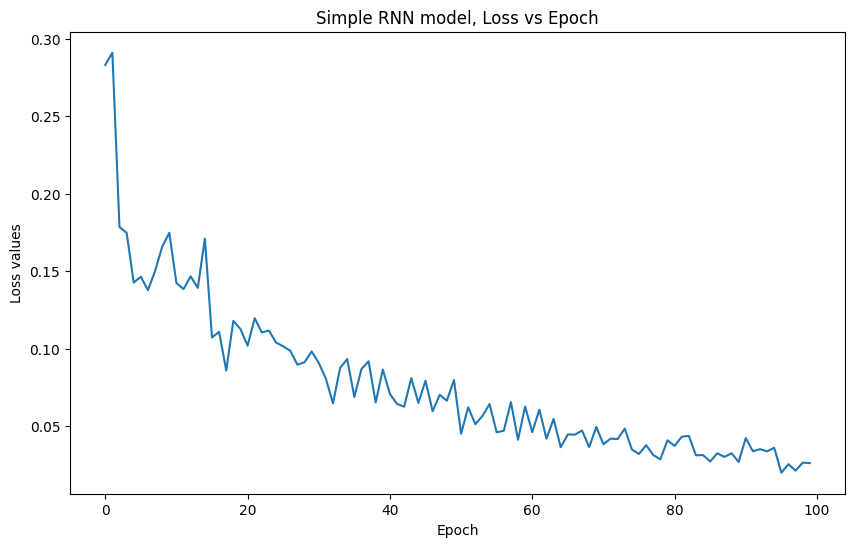

In [ ]:
# Trends of Loss
plt.figure(figsize =(10,6))
plt.plot(training.history["loss"])
plt.xlabel("Epoch")
plt.ylabel("Loss values")
plt.title("Simple RNN model, Loss vs Epoch")
plt.show()

## DOWNWARD TREND OF LOSS AND HAS SETTLED THERE

In [ ]:
model = Sequential()
# RNN layer 1
model.add(SimpleRNN(12, input_shape=(look_backf, 1), return_sequences=True))
model.add(Dropout(0.1))
#RNN layer 2
model.add(SimpleRNN(12, return_sequences=True))
model.add(Dropout(0.1))
#RNN layer 3
model.add(SimpleRNN(12, return_sequences=True))
model.add(Dropout(0.1))
#RNN layer 4
model.add(SimpleRNN(12))
model.add(Dropout(0.1))

# Dense layer
model.add(Dense(1))

#Compiling the model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

# Testing the model
testing = model.fit(x_testf, y_testf, epochs=100, batch_size=95)

Epoch 1/100
1/1 [==============================] - 5s 5s/step - loss: 0.5822 - accuracy: 0.0833
Epoch 2/100
1/1 [==============================] - 0s 20ms/step - loss: 0.3609 - accuracy: 0.0417
Epoch 3/100
1/1 [==============================] - 0s 20ms/step - loss: 0.4837 - accuracy: 0.0833
Epoch 4/100
1/1 [==============================] - 0s 20ms/step - loss: 0.4109 - accuracy: 0.0417
Epoch 5/100
1/1 [==============================] - 0s 19ms/step - loss: 0.1444 - accuracy: 0.0833
Epoch 6/100
1/1 [==============================] - 0s 22ms/step - loss: 0.2425 - accuracy: 0.1250
Epoch 7/100
1/1 [==============================] - 0s 20ms/step - loss: 0.2881 - accuracy: 0.0417
Epoch 8/100
1/1 [==============================] - 0s 23ms/step - loss: 0.2040 - accuracy: 0.0417
Epoch 9/100
1/1 [==============================] - 0s 21ms/step - loss: 0.2808 - accuracy: 0.1250
Epoch 10/100
1/1 [==============================] - 0s 22ms/step - loss: 0.2241 - accuracy: 0.1250
Epoch 11/100
1/1 [===

In [ ]:
# Price Predictions
predsf = model.predict(x_trainf)
# Scale them back to original scale from 0-1
predsf = scaler_train.inverse_transform(predsf)
predsf.shape

5/5 [==============================] - 1s 5ms/step


(133, 1)

In [ ]:
# Price Predictions on Test dataset
testf_preds = model.predict(x_testf)
# Scale them back to original scale from 0-1
testf_preds = scaler_test.inverse_transform(testf_preds)
testf_preds.shape

1/1 [==============================] - 0s 28ms/step


(24, 1)

U.S INFLATION PREDICTION

This dataset provides monthly data of US Consumer Price Index (CPI). Average of CPI for all US cities, in a given month, is provided. Details of columns:

Yearmon - Year-month in date format. Day is provided as 1 for each month.
CPI - Consumer price index

In [ ]:
cpidata= pd.read_csv("uscpi.csv")
cpidata

,Year,CPI
0,1/10/1999,168.200
1,1/11/1999,168.300
2,1/12/1999,168.300
3,1/1/2000,168.800
4,1/2/2000,169.800
...,...,...
257,1/3/2021,264.877
258,1/4/2021,267.054
259,1/5/2021,269.195
260,1/6/2021,271.696


In [ ]:
cpidata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262 entries, 0 to 261
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    262 non-null    object 
 1   CPI     262 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.2+ KB


In [ ]:
print(f"Number of missing data : \n{cpidata.isnull().sum()}\n")

Number of missing data : 
Year    0
CPI     0
dtype: int64



In [ ]:
cpidata['Year'] = pd.to_datetime(cpidata['Year'])

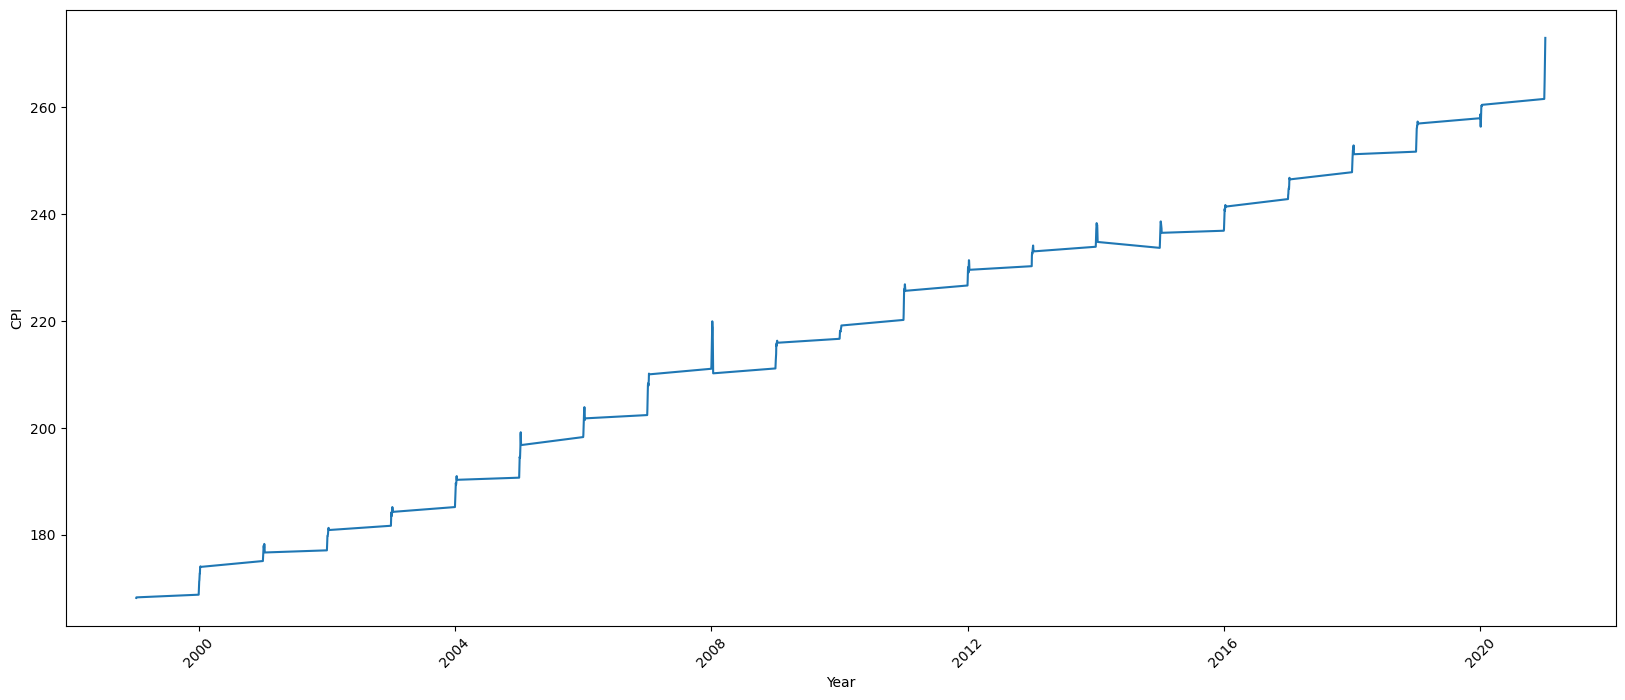

In [ ]:
import seaborn as sns
plt.rcParams["figure.figsize"] = (20,8)
sns.lineplot(data=cpidata, x="Year", y="CPI")
plt.xticks( rotation = 45) # Rotates X-Axis Ticks by 45-degrees
ax = plt.gca()

plt.show()

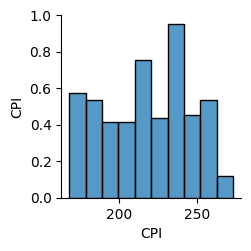

In [ ]:
sns.pairplot(cpidata)

In [ ]:
cpidata.describe()

,CPI
count,262.000000
mean,218.197771
std,27.767416
min,168.200000
25%,193.575000
50%,218.809000
75%,238.564250
max,273.003000


In [ ]:
# Splitting the dataset to train and test
split_ratio = 0.8 # 80% training data, 20% test data,

traincpi_length = round(split_ratio * len(cpidata))
testcpi_length = round(len(cpidata) - traincpi_length)

#print(traincpi_length)
#print(testcpi_length)

In [ ]:
traincpi = cpidata[:traincpi_length].iloc[:,:] # picking the training samples
traincpi

,Year,CPI
0,1999-01-10,168.200
1,1999-01-11,168.300
2,1999-01-12,168.300
3,2000-01-01,168.800
4,2000-01-02,169.800
...,...,...
205,2016-01-11,241.353
206,2016-01-12,241.432
207,2017-01-01,242.839
208,2017-01-02,243.603


In [ ]:
testcpi = cpidata[traincpi_length:traincpi_length+testcpi_length].iloc[:,:] # picking the validation samples
testcpi['Year'] = pd.to_datetime(testcpi['Year'])
testcpi

<ipython-input-94-38bf247fb054>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testcpi['Year'] = pd.to_datetime(testcpi['Year'])


,Year,CPI
210,2017-01-04,244.524
211,2017-01-05,244.733
212,2017-01-06,244.955
213,2017-01-07,244.786
214,2017-01-08,245.519
215,2017-01-09,246.819
216,2017-01-10,246.663
217,2017-01-11,246.669
218,2017-01-12,246.524
219,2018-01-01,247.867


In [ ]:
cpi_train = traincpi['CPI'].values
cpi_train = np.reshape(cpi_train,(-1,1))
cpi_train.shape

(210, 1)

In [ ]:
# Creating test dataset

cpi_test = testcpi['CPI'].values
cpi_test = np.reshape(cpi_test,(-1,1))
cpi_test.shape

(52, 1)

In [ ]:
def create_dataset(cpidata, look_back=1):
    datacpiX, datacpiY = [], []
    for i in range(look_back,len(cpidata)):
      datacpiX.append(cpidata[i-look_back:i,0])
      datacpiY.append(cpidata[i,0])
    return np.array(datacpiX), np.array(datacpiY)

In [ ]:
# Nomalizing the values to the 0-1 range to reduce the effect of variance
# Min-Max Scaler

scaler_train = MinMaxScaler()
scaler_test = MinMaxScaler()
cpi_train_scaled = scaler_train.fit_transform(cpi_train)
cpi_test_scaled = scaler_test.fit_transform(cpi_test)

print(cpi_train_scaled.shape)
print('----------------')
print(cpi_test_scaled.shape)

(210, 1)
----------------
(52, 1)


In [ ]:
look_backcpi = 12
x_traincpi, y_traincpi = create_dataset(cpi_train_scaled, look_backcpi)
x_testcpi, y_testcpi= create_dataset(cpi_test_scaled, look_backcpi)

In [ ]:
x_traincpi = np.reshape(x_traincpi, (x_traincpi.shape[0], x_traincpi.shape[1], 1))
y_traincpi = np.reshape(y_traincpi, (y_traincpi.shape[0], 1))

x_testcpi = np.reshape(x_testcpi, (x_testcpi.shape[0], x_testcpi.shape[1], 1))
y_testcpi = np.reshape(y_testcpi, (y_testcpi.shape[0], 1))

In [ ]:
model = Sequential()
# RNN layer 1
model.add(SimpleRNN(12, input_shape=(look_backcpi, 1), return_sequences=True))
model.add(Dropout(0.1))
#RNN layer 2
model.add(SimpleRNN(12, return_sequences=True))
model.add(Dropout(0.1))
#RNN layer 3
model.add(SimpleRNN(12, return_sequences=True))
model.add(Dropout(0.1))
#RNN layer 4
model.add(SimpleRNN(12))
model.add(Dropout(0.1))

# Dense layer
model.add(Dense(1))

#Compiling the model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

# Training the model
training = model.fit(x_traincpi, y_traincpi, epochs=100, batch_size=95)

Epoch 1/100
3/3 [==============================] - 6s 18ms/step - loss: 0.7766 - accuracy: 0.0051
Epoch 2/100
3/3 [==============================] - 0s 18ms/step - loss: 0.4832 - accuracy: 0.0051
Epoch 3/100
3/3 [==============================] - 0s 15ms/step - loss: 0.2728 - accuracy: 0.0051
Epoch 4/100
3/3 [==============================] - 0s 20ms/step - loss: 0.2572 - accuracy: 0.0000e+00
Epoch 5/100
3/3 [==============================] - 0s 17ms/step - loss: 0.2790 - accuracy: 0.0000e+00
Epoch 6/100
3/3 [==============================] - 0s 16ms/step - loss: 0.3043 - accuracy: 0.0000e+00
Epoch 7/100
3/3 [==============================] - 0s 19ms/step - loss: 0.1966 - accuracy: 0.0051
Epoch 8/100
3/3 [==============================] - 0s 16ms/step - loss: 0.2291 - accuracy: 0.0051
Epoch 9/100
3/3 [==============================] - 0s 15ms/step - loss: 0.2442 - accuracy: 0.0051
Epoch 10/100
3/3 [==============================] - 0s 15ms/step - loss: 0.2044 - accuracy: 0.0051
Epoch 1

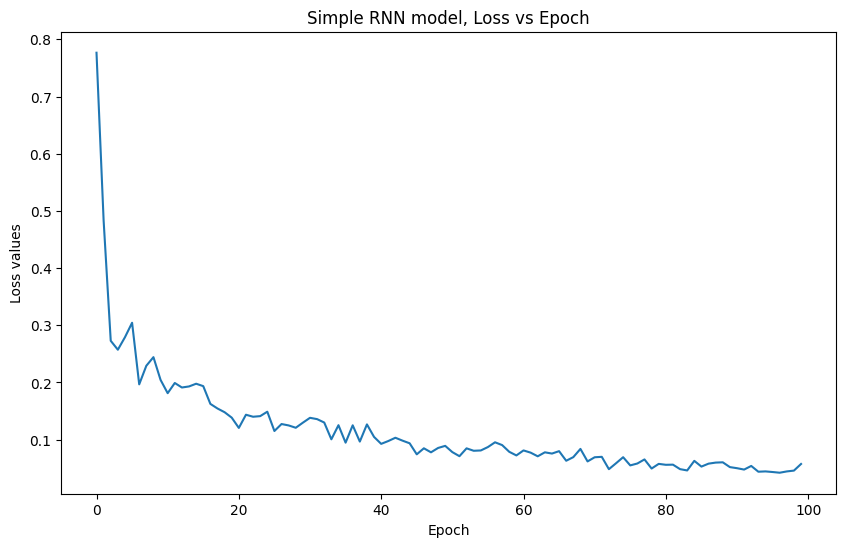

In [ ]:
# Trends of Loss
plt.figure(figsize =(10,6))
plt.plot(training.history["loss"])
plt.xlabel("Epoch")
plt.ylabel("Loss values")
plt.title("Simple RNN model, Loss vs Epoch")
plt.show()

## DOWNWARD TREND OF LOSS AND HAS SETTLED THERE

In [ ]:
model = Sequential()
# RNN layer 1
model.add(SimpleRNN(12, input_shape=(look_backcpi, 1), return_sequences=True))
model.add(Dropout(0.1))
#RNN layer 2
model.add(SimpleRNN(12, return_sequences=True))
model.add(Dropout(0.1))
#RNN layer 3
model.add(SimpleRNN(12, return_sequences=True))
model.add(Dropout(0.1))
#RNN layer 4
model.add(SimpleRNN(12))
model.add(Dropout(0.1))

# Dense layer
model.add(Dense(1))

#Compiling the model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

# Testing the model
testcpi = model.fit(x_testcpi, y_testcpi, epochs=10, batch_size=95)

Epoch 1/10
1/1 [==============================] - 8s 8s/step - loss: 0.8751 - accuracy: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 0s 41ms/step - loss: 0.6444 - accuracy: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 0s 37ms/step - loss: 0.3656 - accuracy: 0.0000e+00
Epoch 4/10
1/1 [==============================] - 0s 53ms/step - loss: 0.3405 - accuracy: 0.0000e+00
Epoch 5/10
1/1 [==============================] - 0s 41ms/step - loss: 0.2383 - accuracy: 0.0000e+00
Epoch 6/10
1/1 [==============================] - 0s 56ms/step - loss: 0.3454 - accuracy: 0.0000e+00
Epoch 7/10
1/1 [==============================] - 0s 70ms/step - loss: 0.3870 - accuracy: 0.0000e+00
Epoch 8/10
1/1 [==============================] - 0s 45ms/step - loss: 0.4301 - accuracy: 0.0000e+00
Epoch 9/10
1/1 [==============================] - 0s 33ms/step - loss: 0.4209 - accuracy: 0.0250
Epoch 10/10
1/1 [==============================] - 0s 41ms/step - loss: 0.2784 - accuracy: 0.0250

In [ ]:
# Price Predictions
predscpi = model.predict(x_traincpi)
# Scale them back to original scale from 0-1
predscpi = scaler_train.inverse_transform(predscpi)
predscpi.shape

7/7 [==============================] - 1s 8ms/step


(198, 1)

In [ ]:
# Price Predictions on Test dataset
testcpi_predcpi = model.predict(x_testcpi)
# Scale them back to original scale from 0-1
testf_predcpi = scaler_test.inverse_transform(testcpi_predcpi)
testcpi_predcpi.shape

2/2 [==============================] - 0s 12ms/step


(40, 1)

In [ ]:
#from sklearn.ensemble import RandomForestClassifier
#model = RandomForestClassifier()
#model.fit(x_traincpi, y_traincpi)


#predscpi = model.predict(x_testcpi)
#ac_KNN = accuracy_score(y_testcpi,predscpi)
#print(ac_KNN)


Found array with dim 3. RandomForestClassifier expected <= 2.

Data set is unfit to run with RFC and other base models because the data set shape has 3D and 2D shape values.